In [2]:
import os
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from tifffile import imread
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models


In [3]:
!pip install scikit-learn

In [4]:

root_folder = 'Data/Data'  # Adjust the path as needed
for subdir, dirs, files in os.walk(root_folder):
    for file in files:
        print(file)


.DS_Store
README.md
TCGA_CS_4941_19960909_1.tif
TCGA_CS_4941_19960909_10.tif
TCGA_CS_4941_19960909_10_mask.tif
TCGA_CS_4941_19960909_11.tif
TCGA_CS_4941_19960909_11_mask.tif
TCGA_CS_4941_19960909_12.tif
TCGA_CS_4941_19960909_12_mask.tif
TCGA_CS_4941_19960909_13.tif
TCGA_CS_4941_19960909_13_mask.tif
TCGA_CS_4941_19960909_14.tif
TCGA_CS_4941_19960909_14_mask.tif
TCGA_CS_4941_19960909_15.tif
TCGA_CS_4941_19960909_15_mask.tif
TCGA_CS_4941_19960909_16.tif
TCGA_CS_4941_19960909_16_mask.tif
TCGA_CS_4941_19960909_17.tif
TCGA_CS_4941_19960909_17_mask.tif
TCGA_CS_4941_19960909_18.tif
TCGA_CS_4941_19960909_18_mask.tif
TCGA_CS_4941_19960909_19.tif
TCGA_CS_4941_19960909_19_mask.tif
TCGA_CS_4941_19960909_1_mask.tif
TCGA_CS_4941_19960909_2.tif
TCGA_CS_4941_19960909_20.tif
TCGA_CS_4941_19960909_20_mask.tif
TCGA_CS_4941_19960909_21.tif
TCGA_CS_4941_19960909_21_mask.tif
TCGA_CS_4941_19960909_22.tif
TCGA_CS_4941_19960909_22_mask.tif
TCGA_CS_4941_19960909_23.tif
TCGA_CS_4941_19960909_23_mask.tif
TCGA_CS_4

In [5]:
# Apply CLAHE to enhance contrast
def apply_clahe(image):
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    return clahe.apply(image)

# Function to load and preprocess images from all subfolders
def load_and_preprocess_images(root_folder):
    images = []
    masks = []
    
    for subdir, dirs, files in os.walk(root_folder):
        for file in files:
            if file.endswith(".tif") and "_mask" not in file:  # Exclude mask files initially
                img_path = os.path.join(subdir, file)
                img = imread(img_path)
                
                if len(img.shape) == 3:  # Check if the image is in color (3 channels)
                    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale if necessary
                
                img = apply_clahe(img)
                
                # Find corresponding mask file
                mask_file = file.replace('.tif', '_mask.tif')
                mask_path = os.path.join(subdir, mask_file)
                
                if os.path.exists(mask_path):
                    mask = imread(mask_path)
                    
                    if len(mask.shape) == 3:  # Check if the mask is in color (3 channels)
                        mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)  # Convert mask to grayscale if necessary
                    
                    images.append(img)
                    masks.append(mask)
    
    images = np.array(images)
    masks = np.array(masks)
    
    # Normalize images and masks
    images = images / 255.0
    masks = masks / 255.0
    return images, masks

# Path to folder containing subfolders of images and masks

# Load images and masks
images, masks = load_and_preprocess_images(root_folder)

# Splitting the dataset (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(images, masks, test_size=0.2, random_state=42)


In [20]:
test_file = 'Data/Data/TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_1.tif'  # Replace with an actual file path
try:
    image = tiff.imread(test_file)
    print("Image loaded successfully!")
except Exception as e:
    print(f"Failed to load image {test_file}: {e}")


Failed to load image Data/Data/TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_1.tif: name 'tiff' is not defined


In [7]:
# Reshape images and masks to include the channel dimension
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)
y_train = np.expand_dims(y_train, axis=-1)
y_test = np.expand_dims(y_test, axis=-1)

# Ensure they are numpy arrays
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")

X_train shape: (3143, 256, 256, 1)
y_train shape: (3143, 256, 256, 1)


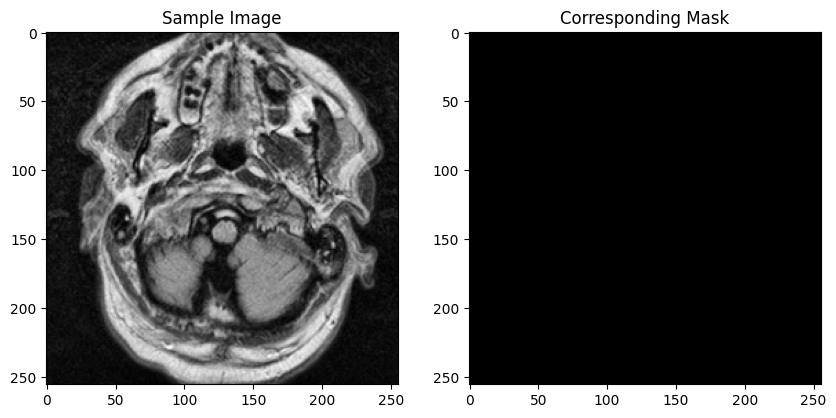

In [8]:
# Visualizing a sample image and its corresponding mask
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(X_train[0], cmap='gray')
plt.title('Sample Image')
plt.subplot(1, 2, 2)
plt.imshow(y_train[0], cmap='gray')
plt.title('Corresponding Mask')
plt.show()


In [9]:
# Check data types
print(f"X_train type: {type(X_train)}, y_train type: {type(y_train)}")
print(f"X_test type: {type(X_test)}, y_test type: {type(y_test)}")


X_train type: <class 'numpy.ndarray'>, y_train type: <class 'numpy.ndarray'>
X_test type: <class 'numpy.ndarray'>, y_test type: <class 'numpy.ndarray'>


In [10]:
# Reshape to ensure the right dimensions for input
if len(X_train.shape) == 3:  # If images are missing the channel dimension
    X_train = np.expand_dims(X_train, axis=-1)
    X_test = np.expand_dims(X_test, axis=-1)

if len(y_train.shape) == 3:  # If masks are missing the channel dimension
    y_train = np.expand_dims(y_train, axis=-1)
    y_test = np.expand_dims(y_test, axis=-1)

# Convert to NumPy arrays if they are not already
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (3143, 256, 256, 1)
y_train shape: (3143, 256, 256, 1)
X_test shape: (786, 256, 256, 1)
y_test shape: (786, 256, 256, 1)


In [11]:
# Check for invalid values in the dataset
print(f"X_train contains NaN: {np.isnan(X_train).any()}")
print(f"y_train contains NaN: {np.isnan(y_train).any()}")
print(f"X_test contains NaN: {np.isnan(X_test).any()}")
print(f"y_test contains NaN: {np.isnan(y_test).any()}")

# Check for None values
print(f"X_train contains None: {any(x is None for x in X_train)}")
print(f"y_train contains None: {any(x is None for x in y_train)}")
print(f"X_test contains None: {any(x is None for x in X_test)}")
print(f"y_test contains None: {any(x is None for x in y_test)}")


X_train contains NaN: False
y_train contains NaN: False
X_test contains NaN: False
y_test contains NaN: False
X_train contains None: False
y_train contains None: False
X_test contains None: False
y_test contains None: False


In [12]:
# Check the shape of the dataset
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (3143, 256, 256, 1)
y_train shape: (3143, 256, 256, 1)
X_test shape: (786, 256, 256, 1)
y_test shape: (786, 256, 256, 1)


In [13]:
input_shape = X_train.shape[1:]  # Example: (256, 256, 1) for grayscale images


In [14]:
# Convert the data to float32 if necessary
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')


In [15]:
y_train = y_train / 255.0
y_test = y_test / 255.0


## Nested U-Net Implementation:

In [16]:
import numpy as np

print(type(X_train), type(y_train), type(X_test), type(y_test))

# Convert to numpy arrays if they are not
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)


<class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [17]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (3143, 256, 256, 1)
y_train shape: (3143, 256, 256, 1)
X_test shape: (786, 256, 256, 1)
y_test shape: (786, 256, 256, 1)


In [18]:
X_train = X_train.astype(np.float32) / 255.0  # Normalize image data
y_train = y_train.astype(np.float32)  # Ensure masks are float for compatibility
X_test = X_test.astype(np.float32) / 255.0
y_test = y_test.astype(np.float32)


In [27]:
import numpy as np

# Assuming X_train, y_train, X_test, y_test are already defined as numpy arrays

# Check shapes and types
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

# Normalize image data and ensure correct data types
X_train = X_train.astype(np.float32) / 255.0
y_train = y_train.astype(np.float32)  # Ensure masks are in the right format
X_test = X_test.astype(np.float32) / 255.0
y_test = y_test.astype(np.float32)

import tensorflow as tf
from tensorflow.keras import layers, models

def nested_unet_block(input_tensor, filters):
    # First convolution block
    conv1 = layers.Conv2D(filters, (3, 3), activation='relu', padding='same')(input_tensor)
    conv1 = layers.Conv2D(filters, (3, 3), activation='relu', padding='same')(conv1)
    
    # Second convolution block (nested)
    conv2 = layers.Conv2D(filters, (3, 3), activation='relu', padding='same')(conv1)
    conv2 = layers.Conv2D(filters, (3, 3), activation='relu', padding='same')(conv2)

    # Skip connection
    output = layers.add([conv1, conv2])

    return output

def build_nested_unet(input_shape):
    inputs = layers.Input(input_shape)

    # Encoder path
    block1 = nested_unet_block(inputs, 64)
    pool1 = layers.MaxPooling2D((2, 2))(block1)

    block2 = nested_unet_block(pool1, 128)
    pool2 = layers.MaxPooling2D((2, 2))(block2)

    block3 = nested_unet_block(pool2, 256)
    pool3 = layers.MaxPooling2D((2, 2))(block3)

    block4 = nested_unet_block(pool3, 512)
    pool4 = layers.MaxPooling2D((2, 2))(block4)

    # Bottleneck
    bottleneck = nested_unet_block(pool4, 1024)

    # Decoder path
    up4 = layers.Concatenate()([layers.UpSampling2D((2, 2))(bottleneck), block4])
    block4_up = nested_unet_block(up4, 512)

    up3 = layers.Concatenate()([layers.UpSampling2D((2, 2))(block4_up), block3])
    block3_up = nested_unet_block(up3, 256)

    up2 = layers.Concatenate()([layers.UpSampling2D((2, 2))(block3_up), block2])
    block2_up = nested_unet_block(up2, 128)

    up1 = layers.Concatenate()([layers.UpSampling2D((2, 2))(block2_up), block1])
    block1_up = nested_unet_block(up1, 64)

    # Output layer
    outputs = layers.Conv2D(1, (1, 1), activation='sigmoid')(block1_up)

    model = models.Model(inputs, outputs)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', dice_metric])

    return model

# Dice Score Metric
def dice_metric(y_true, y_pred):
    y_true_f = tf.keras.backend.flatten(y_true)
    y_pred_f = tf.keras.backend.flatten(y_pred)
    intersection = tf.keras.backend.sum(y_true_f * y_pred_f)
    return (2. * intersection + 1) / (tf.keras.backend.sum(y_true_f) + tf.keras.backend.sum(y_pred_f) + 1)

# Example usage
input_shape = (256, 256, 1)  # Assuming images are resized to 256x256
nested_unet = build_nested_unet(input_shape)
nested_unet.summary()



X_train shape: (3143, 256, 256, 1)
y_train shape: (3143, 256, 256, 1)
X_test shape: (786, 256, 256, 1)
y_test shape: (786, 256, 256, 1)


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 256, 256,  │        640 │ input_layer[0][0] │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 256, 256,  │     36,928 │ conv2d[0][0]      │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 256, 256,  │     36,928 │ conv2d_1[0][0]    │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 256, 256,  │     36,928 │ conv2d_2[0][0]    │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 256, 256,  │          0 │ conv2d_1[0][0],   │
│                     │ 64)               │            │ conv2d_3[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 128, 128,  │          0 │ add[0][0]         │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 128, 128,  │     73,856 │ max_pooling2d[0]… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 128, 128,  │    147,584 │ conv2d_4[0][0]    │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 128, 128,  │    147,584 │ conv2d_5[0][0]    │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 128, 128,  │    147,584 │ conv2d_6[0][0]    │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_1 (Add)         │ (None, 128, 128,  │          0 │ conv2d_5[0][0],   │
│                     │ 128)              │            │ conv2d_7[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 64, 64,    │          0 │ add_1[0][0]       │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_8 (Conv2D)   │ (None, 64, 64,    │    295,168 │ max_pooling2d_1[… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_9 (Conv2D)   │ (None, 64, 64,    │    590,080 │ conv2d_8[0][0]    │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_10 (Conv2D)  │ (None, 64, 64,    │    590,080 │ conv2d_9[0][0]    │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_11 (Conv2D)  │ (None, 64, 64,    │    590,080 │ conv2d_10[0][0] 

 Total params: 62,791,809 (239.53 MB)

 Trainable params: 62,791,809 (239.53 MB)

 Non-trainable params: 0 (0.00 B)

In [32]:
import tensorflow as tf

# Check if GPU is available
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    print(f"GPUs found: {[gpu.name for gpu in gpus]}")
else:
    print("No GPUs found.")


No GPUs found.


In [30]:
pip install tensorflow --upgrade


Note: you may need to restart the kernel to use updated packages.


In [31]:
# Enable memory growth for the GPU
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)


In [28]:
# Assuming X_train, y_train, X_test, y_test are properly preprocessed and shaped
nested_unet.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=8)


Epoch 1/20
  5/393 ━━━━━━━━━━━━━━━━━━━━ 1:00:34 9s/step - accuracy: 0.9889 - dice_metric: 0.0023 - loss: 9.6233

KeyboardInterrupt: 

## 3. Model Training and Evaluation

nested_unet.load_weights('./models/model_weights/nested_unet.h5')
attention_unet.load_weights('./models/model_weights/attention_unet.h5')

# Evaluate on test data
nested_eval = nested_unet.evaluate(X_test, y_test)
attention_eval = attention_unet.evaluate(X_test, y_test)

print(f"Nested U-Net Test Loss: {nested_eval[0]}, Test Accuracy: {nested_eval[1]}")
print(f"Attention U-Net Test Loss: {attention_eval[0]}, Test Accuracy: {attention_eval[1]}")
